<a href="https://colab.research.google.com/github/Kondwani7/Crop-yield-Prediction-Choma/blob/main/Choma_Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
configure_plotly_browser_state()

warnings.filterwarnings('ignore')
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Lambda, Conv1D
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DJA stock exchange/Choma Data/SPro_Farm_Data_revised.csv', index_col='Date',parse_dates=['Date'])

In [ ]:
df.head(20)

,Rainfall (mm),Average Temperature,wind speed(kmph),Pressure (mb),Humidity (%),cloud cover(%),Yield(Mt/Ha)
Date,,,,,,,
2011-01-01,74.90,22,4.7,1010.6,0.76,0.27,0.776008
2011-02-01,107.80,22,5.2,1011.6,0.80,0.39,0.776008
2011-03-01,78.52,23,5.3,1012.2,0.80,0.35,0.776008
2011-04-01,11.52,22,5.4,1013.7,0.82,0.37,0.776008
2011-05-01,1.17,21,4.9,1016.4,0.82,0.38,0.776008
2011-06-01,1.09,20,3.8,1017.6,0.80,0.31,0.776008
2011-07-01,1.04,19,4.5,1018.6,0.77,0.24,0.776008
2011-08-01,0.62,19,3.9,1017.8,0.75,0.25,0.776008
2011-09-01,0.14,21,4.4,1016.4,0.68,0.15,0.776008


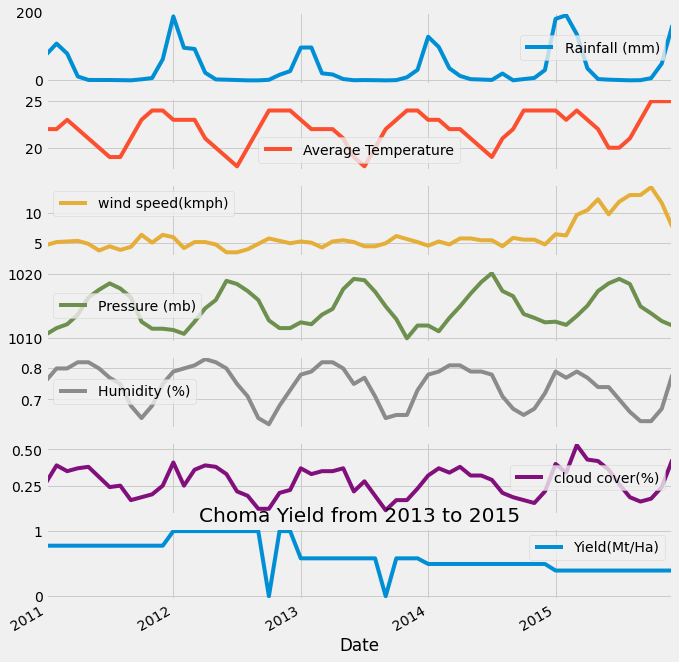

In [ ]:
df['2011':'2015'].plot(subplots=True,  figsize = (10,12))
plt.title('Choma Yield from 2013 to 2015')
plt.savefig('Choma.png')
plt.show()

In [ ]:
df.shape

(60, 7)

In [ ]:
df.describe()

,Rainfall (mm),Average Temperature,wind speed(kmph),Pressure (mb),Humidity (%),cloud cover(%),Yield(Mt/Ha)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,36.378000,22.016667,6.161667,1014.676667,0.743333,0.276000,0.623221
std,53.455923,1.836464,2.567403,2.832341,0.062941,0.103354,0.242271
min,0.000000,18.000000,3.500000,1010.000000,0.620000,0.080000,0.000000
25%,1.085000,21.000000,4.800000,1012.200000,0.680000,0.187500,0.495244
50%,6.940000,22.000000,5.300000,1013.850000,0.765000,0.275000,0.581979
75%,52.155000,23.250000,6.050000,1017.400000,0.792500,0.362500,0.776008
max,191.010000,25.000000,14.300000,1020.200000,0.830000,0.530000,1.000198


In [ ]:
df.isnull().sum()

Rainfall (mm)          0
Average Temperature    0
wind speed(kmph)       0
Pressure (mb)          0
Humidity (%)           0
cloud cover(%)         0
Yield(Mt/Ha)           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2011-01-01 to 2015-12-01
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall (mm)        60 non-null     float64
 1   Average Temperature  60 non-null     int64  
 2   wind speed(kmph)     60 non-null     float64
 3   Pressure (mb)        60 non-null     float64
 4   Humidity (%)         60 non-null     float64
 5   cloud cover(%)       60 non-null     float64
 6   Yield(Mt/Ha)         60 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 6.2 KB


In [ ]:
df.nunique()

Rainfall (mm)          57
Average Temperature     8
wind speed(kmph)       36
Pressure (mb)          40
Humidity (%)           21
cloud cover(%)         33
Yield(Mt/Ha)            6
dtype: int64

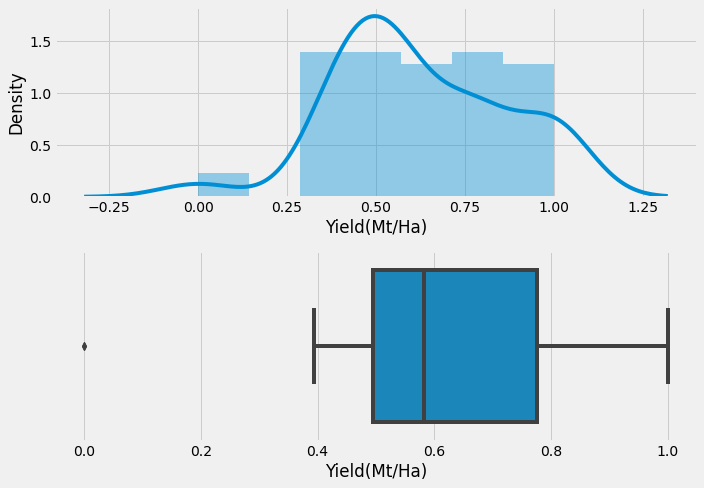

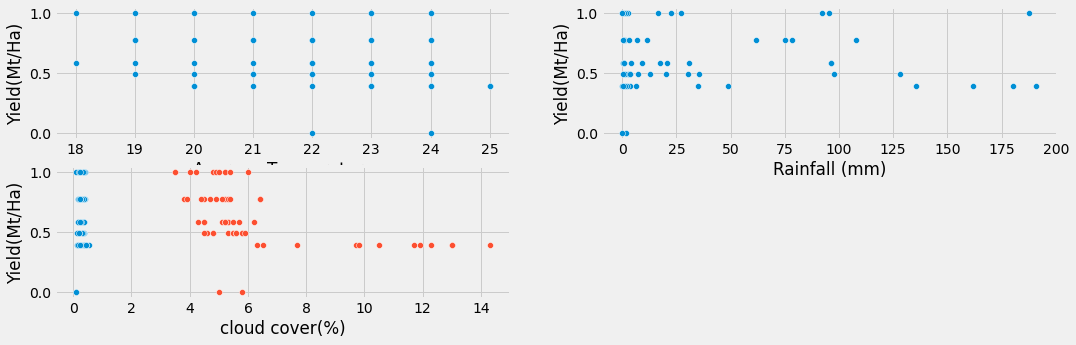

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Yield(Mt/Ha)'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Yield(Mt/Ha)'])
plt.tight_layout()

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df['Average Temperature'], df['Yield(Mt/Ha)'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['Rainfall (mm)'],df['Yield(Mt/Ha)'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['cloud cover(%)'],df['Yield(Mt/Ha)'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['wind speed(kmph)'],df['Yield(Mt/Ha)'])

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Nike Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Nike Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
training_set = df[:'2015'].iloc[:,1:2].values
test_set = df['2015':].iloc[:,1:2].values

In [ ]:
print(len(training_set))
print(len(test_set))

48
12


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

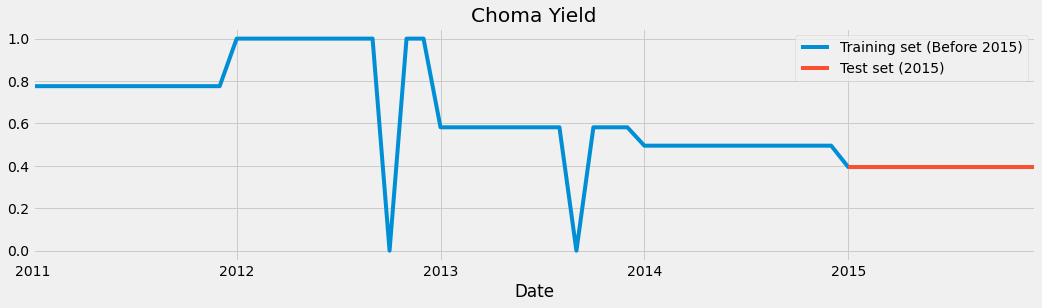

In [ ]:
df["Yield(Mt/Ha)"][:'2015'].plot(figsize=(16,4),legend=True)
df["Yield(Mt/Ha)"]['2015':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2015)','Test set (2015)'])
plt.title('Choma Yield')
plt.show()

In [ ]:
df.head()

,Rainfall (mm),Average Temperature,wind speed(kmph),Pressure (mb),Humidity (%),cloud cover(%),Yield(Mt/Ha)
Date,,,,,,,
2011-01-01,74.90,22,4.7,1010.6,0.76,0.27,0.776008
2011-02-01,107.80,22,5.2,1011.6,0.80,0.39,0.776008
2011-03-01,78.52,23,5.3,1012.2,0.80,0.35,0.776008
2011-04-01,11.52,22,5.4,1013.7,0.82,0.37,0.776008
2011-05-01,1.17,21,4.9,1016.4,0.82,0.38,0.776008


In [ ]:
X = df.drop('Yield(Mt/Ha)',axis =1).values
y = df['Yield(Mt/Ha)'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
##scaling the data set
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('Yield(Mt/Ha)',axis =1).columns, columns=['Coefficient']) 
coeff_df

0.6368055680000011
[-0.08116474 -0.14041562 -0.04398008 -0.18859516  0.04526434  0.00561202]


,Coefficient
Rainfall (mm),-0.081165
Average Temperature,-0.140416
wind speed(kmph),-0.043980
Pressure (mb),-0.188595
Humidity (%),0.045264
cloud cover(%),0.005612


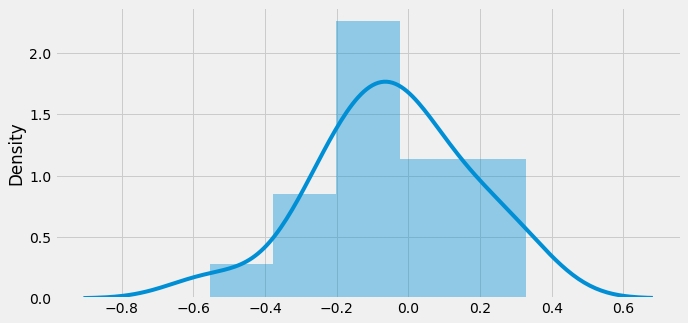

In [ ]:
#visualisation of the residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [ ]:
y_pred = regressor.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = data.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.16673187318195454
MSE: 0.04555937878814055
RMSE: 0.2134464307224193
VarScore: 0.33353148303928837


# Ridge regressor


In [ ]:
from sklearn.linear_model import Ridge
regressor = Ridge()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('Yield(Mt/Ha)',axis =1).columns, columns=['Coefficient']) 
coeff_df

0.6368055680000009
[-0.0712284  -0.09975284 -0.05363706 -0.14483112  0.05042659 -0.00146641]


,Coefficient
Rainfall (mm),-0.071228
Average Temperature,-0.099753
wind speed(kmph),-0.053637
Pressure (mb),-0.144831
Humidity (%),0.050427
cloud cover(%),-0.001466


In [ ]:
y_pred = regressor.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = data.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.16686072751797007
MSE: 0.04564472772817527
RMSE: 0.21364626776093065
VarScore: 0.321736619137477
